In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Load and Read Data

In [2]:
train_df =  pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Converting CSV recordes to images format by reading values of data frames and reshaping them

In [4]:
X_train = train_df[train_df.columns[1:]].values
y_train = train_df['label'].values

X_test = test_df[test_df.columns[1:]].values
y_test = test_df['label'].values

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In this notebook we dont want to classificate data; So we can concatenate train and test data to get all the images and labels

In [5]:
all_images = np.concatenate((X_train, X_test), axis=0)
all_labels = np.concatenate((y_train, y_test), axis=None)
print(all_images.shape)

(70000, 28, 28, 1)


As you see there are 70000 images totally and here we're going to plot the first 100 of them

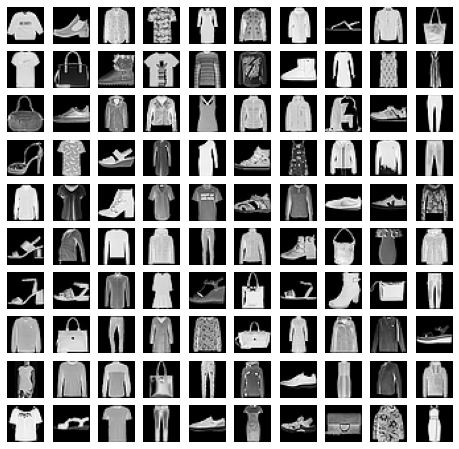

In [6]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 8))
for i in range(10 * 10):
    fig.add_subplot(10, 10, i+1)
    plt.axis('off')
    plt.imshow(all_images[i], cmap='gray')
plt.show()

# Conditional GAN

As you know, GANs have two main parts;
* **Generator**: an ANN tring to learn how to create fake data by converting latenet vector(random numbers) to what data form we want.
* **Discriminator**: an other ANN tring to labeling fake data from real data

In fact, generator and discriminator are competitors; generator tries to make the image close to reality and discriminator tries to distinguish the real image from the fake one. The more we train the network, both generator and discriminator will improve and perform better. Of course, generator is more important for us because it is the output of the GAN model.


The main difference between GANs and CGANs is that in CGANs, unlike GANs, the labels of data are given to the model and this allows us to create our desired data. There are different types of CGANs with different tasks and structures.


To learn more about these networks, you can see the following tutorial. Mr.Sreeni has provided more details in a simple and understandable language. In fact, this is a fork of his code with some small changes.


[https://www.youtube.com/playlist?list=PLZsOBAyNTZwboR4_xj-n3K6XBTweC4YVD](http://)

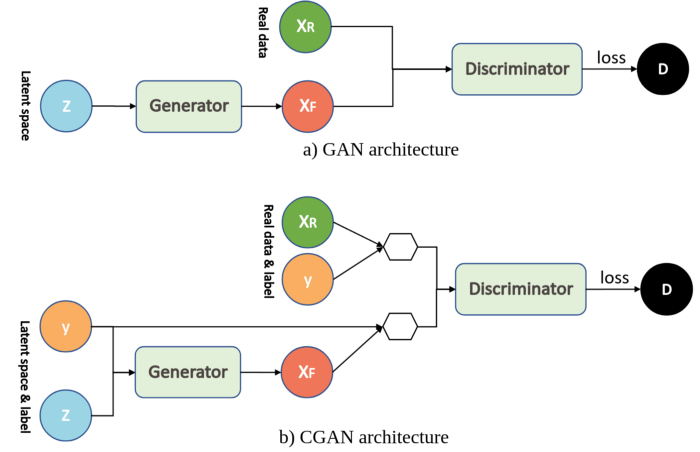

# Implementation of CGAN

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout,Embedding, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

def discriminator(in_shape=(28,28,1), n_classes=10):
    # label input
    in_label = Input(shape=(1,))  #Shape 1
    # embedding for categorical input
    #each label (total 10 classes for fashion mnist), will be represented by a vector of size 50. 
    #This vector of size 50 will be learnt by the discriminator
    lbl = Embedding(n_classes, 50)(in_label) #Shape 1,50
    # scale up to image dimensions with linear activation. 
    lbl = Dense(in_shape[0] * in_shape[1])(lbl)  #28x28 = 784 to Shape = 1, 784
    # reshape to additional channel
    lbl = Reshape((in_shape[0], in_shape[1], 1))(lbl)  #28x28x1
    
    
    # image input
    in_image = Input(shape=in_shape) #28x28x1
    # concat label as a channel
    merge = Concatenate()([in_image, lbl]) #28x28x2 (2 channels; 1 for images and one for labels)
    
    # downsample: We will combine input label with input image and supply as inputs to the model. 
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge) #14x14x128
    fe = LeakyReLU(alpha=0.2)(fe)
    # downsample
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe) #7x7x128
    fe = LeakyReLU(alpha=0.2)(fe)
    # flatten feature maps
    fe = Flatten()(fe)  #6272 (7*7*128=6272)
    # dropout
    fe = Dropout(0.4)(fe)
    # output
    out_layer = Dense(1, activation='sigmoid')(fe)  #Shape=1
    
    # define model
    ##Combine input label with input image and supply as inputs to the model. 
    model = Model([in_image, in_label], out_layer)
    plot_model(model, show_shapes=True)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [8]:
def generator(latent_dim, n_classes=10):
    
    # label input
    in_label = Input(shape=(1,))  #shape 1
    # embedding for categorical input
    #each label (total 10 classes for FashionMnist), will be represented by a vector of size 50. 
    lbl = Embedding(n_classes, 50)(in_label) #Shape 1,50  
    # To match the dimensions for concatenation later in this step.  
    n_nodes = 7 * 7
    lbl = Dense(n_nodes)(lbl) #1,49
    # reshape to additional channel
    lbl = Reshape((7, 7, 1))(lbl)
       
    # image generator input
    in_lat = Input(shape=(latent_dim,))  #Input of dimension 100   
    # foundation for 7x7 image
    # We will reshape input latent vector into 7x7 image as a starting point. 
    #So n_nodes for the Dense layer can be 128x7x7 so when we reshape the output 
    #it would be 7x7x128 and that can be slowly upscaled to 28x28 image for output.
    #While defining model inputs we will combine input label and the latent input.
    n_nodes = 128 * 7 * 7
    gen = Dense(n_nodes)(in_lat)  #shape=6272
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Reshape((7, 7, 128))(gen) #shape=7x7x128
    # merge image gen and label input
    merge = Concatenate()([gen, lbl])  #Shape=7x7x129 (Extra channel corresponds to the label)
    # upsample to 14x14
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge) #14x14x128
    gen = LeakyReLU(alpha=0.2)(gen)
    # upsample to 28x28
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen) #28x28x128
    gen = LeakyReLU(alpha=0.2)(gen)
    # output
    out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen) #28x28x1   
    # define model
    model = Model([in_lat, in_label], out_layer)
    plot_model(model, show_shapes=True)
    #Model not compiled as it is not directly trained like the discriminator.
    return model

In [9]:
def GAN(g_model, d_model):
    #Discriminator is trained separately. So set to not trainable.
    d_model.trainable = False 
    
    ## connect generator and discriminator;
    # first, get noise(latent vectors) and label inputs from generator model
    gen_noise, gen_label = g_model.input  #Latent vector size and label size
    # get image output from the generator model
    gen_output = g_model.output  #28x28x1
    
    # generator image output and corresponding input label are inputs to discriminator
    gan_output = d_model([gen_output, gen_label])
    # define gan model as taking noise and label and outputting a classification
    model = Model([gen_noise, gen_label], gan_output)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    model.summary()
    return model

In [10]:
def generate_real_samples(x, y, n_samples):
    # split into images and labels
    images = x
    labels = y
    # choose random instances
    ix = np.random.randint(0, images.shape[0], n_samples)
    # select images and labels
    X, labels = images[ix], labels[ix]
    # generate class labels and assign to y (don't confuse this with the above labels that correspond to fashion mnist labels)
    # Label=1 indicating they are real
    y = np.ones((n_samples, 1))
    return [X, labels], y

In [11]:
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = np.random.randint(0, n_classes, n_samples)
    return [z_input, labels]

In [12]:
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    images = generator.predict([z_input, labels_input])
    # create class labels;
    # Label=0 indicating they are fake
    y = np.zeros((n_samples, 1))
    return [images, labels_input], y

In [13]:
def train(g_model, d_model, gan_model, x, y, latent_dim, n_epochs=100, n_batch=128):
    #the discriminator model is updated for a half batch of real samples 
    #and a half batch of fake samples, combined a single batch.
    bat_per_epo = int(x.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
                            
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):

            # Train the discriminator on real and fake images, separately (half batch each)
            #Research showed that separate training is more effective. 
            
            # get randomly selected 'real' samples
            [X_real, labels_real], y_real = generate_real_samples(x, y, half_batch)
            # update discriminator model weights
            d_loss_real, _ = d_model.train_on_batch([X_real, labels_real], y_real)
            
            # generate 'fake' examples
            [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss_fake, _ = d_model.train_on_batch([X_fake, labels], y_fake)
            
            # prepare points in latent space as input for the generator
            [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
            
            # The generator wants the discriminator to label the generated samples as valid(ones)
            #This is where the generator is trying to trick discriminator into believing
            #the generated image is true (hence value of 1 for y)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # Generator is part of combined model where it got directly linked with the discriminator
            # Train the generator with latent_dim as x and 1 as y. 
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
            
        # Print losses on this batch
        print('Epoch %d, discriminator loss of reals=%.3f, discriminator loss of fakes=%.3f, generator loss=%.3f' %(i+1, d_loss_real, d_loss_fake, g_loss))
            
    # save the generator model
    g_model.save('/kaggle/working/FashionMnist_CGAN_250epochs.h5')

In [14]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = discriminator()
# create the generator
g_model = generator(latent_dim)
# create the gan
gan_model = GAN(g_model, d_model)
# load image data
x = all_images / 255.
y = all_labels
# train model
train(g_model, d_model, gan_model, x, y, latent_dim, n_epochs=250)

2022-10-11 09:34:38.527955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 09:34:38.643137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 09:34:38.643924: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 09:34:38.645069: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 6272)         633472      input_4[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        500         input_3[0][0]                    
____________________________________________________________________________________________

2022-10-11 09:34:43.160830: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-11 09:34:45.105888: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-10-11 09:34:57.160574: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:35:04.719812: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:35:04.835399: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:35:35.839948: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 1, discriminator loss of reals=0.669, discriminator loss of fakes=0.649, generator loss=0.792


2022-10-11 09:35:51.771708: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:36:07.296760: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 2, discriminator loss of reals=0.579, discriminator loss of fakes=0.667, generator loss=0.773


2022-10-11 09:36:38.497698: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:36:39.086481: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:36:39.335123: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 3, discriminator loss of reals=0.651, discriminator loss of fakes=0.558, generator loss=0.924


2022-10-11 09:37:41.089491: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 4, discriminator loss of reals=0.555, discriminator loss of fakes=0.559, generator loss=0.964


2022-10-11 09:38:12.914014: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:38:12.979750: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:38:13.137730: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:38:25.666817: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:38:43.811087: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:38:48.126512: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 5, discriminator loss of reals=0.614, discriminator loss of fakes=0.504, generator loss=1.127


2022-10-11 09:38:58.877700: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:39:42.703311: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 6, discriminator loss of reals=0.539, discriminator loss of fakes=0.525, generator loss=1.230


2022-10-11 09:39:46.172181: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:39:47.032102: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 7, discriminator loss of reals=0.592, discriminator loss of fakes=0.560, generator loss=1.211
Epoch 8, discriminator loss of reals=0.558, discriminator loss of fakes=0.585, generator loss=1.204


2022-10-11 09:41:51.577534: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:41:54.850734: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:41:55.041415: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 9, discriminator loss of reals=0.593, discriminator loss of fakes=0.479, generator loss=1.419


2022-10-11 09:42:27.847601: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 10, discriminator loss of reals=0.523, discriminator loss of fakes=0.533, generator loss=1.284


2022-10-11 09:43:25.628246: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 11, discriminator loss of reals=0.454, discriminator loss of fakes=0.522, generator loss=1.311


2022-10-11 09:43:56.134156: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:43:56.402500: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:43:57.228711: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:44:17.734137: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:44:27.580822: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:44:28.924005: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:44:39.611041: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:44:39.910959: W tensorflow/core/data/root_dataset.cc:16

Epoch 12, discriminator loss of reals=0.592, discriminator loss of fakes=0.563, generator loss=1.351
Epoch 13, discriminator loss of reals=0.487, discriminator loss of fakes=0.396, generator loss=1.583


2022-10-11 09:46:01.661336: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 14, discriminator loss of reals=0.572, discriminator loss of fakes=0.686, generator loss=1.230


2022-10-11 09:46:32.632241: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:46:41.143321: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 15, discriminator loss of reals=0.550, discriminator loss of fakes=0.313, generator loss=1.657


2022-10-11 09:47:35.237030: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 16, discriminator loss of reals=0.421, discriminator loss of fakes=0.474, generator loss=1.370


2022-10-11 09:48:06.437189: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:48:06.549243: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:48:38.105975: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:48:38.220456: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:48:38.477612: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 17, discriminator loss of reals=0.525, discriminator loss of fakes=0.441, generator loss=1.559


2022-10-11 09:49:09.124674: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:49:09.193096: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 18, discriminator loss of reals=0.561, discriminator loss of fakes=0.350, generator loss=1.695


2022-10-11 09:50:12.076189: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:50:12.299021: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:50:20.675066: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 19, discriminator loss of reals=0.644, discriminator loss of fakes=0.513, generator loss=1.331


2022-10-11 09:50:43.347831: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 20, discriminator loss of reals=0.697, discriminator loss of fakes=0.559, generator loss=1.398


2022-10-11 09:51:14.274227: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:51:16.078874: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:51:37.793811: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:51:45.505480: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:51:45.861265: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:51:45.904663: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:51:46.245352: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 21, discriminator loss of reals=0.583, discriminator loss of fakes=0.302, generator loss=1.789


2022-10-11 09:52:16.679694: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:52:16.790546: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:52:47.940687: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 22, discriminator loss of reals=0.414, discriminator loss of fakes=0.669, generator loss=1.294


2022-10-11 09:53:18.961604: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:53:19.684207: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:53:19.814900: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:53:27.935731: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:53:38.928238: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 23, discriminator loss of reals=0.388, discriminator loss of fakes=0.557, generator loss=1.423


2022-10-11 09:54:21.829659: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:54:22.234969: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:54:22.344174: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 24, discriminator loss of reals=0.585, discriminator loss of fakes=0.482, generator loss=1.392


2022-10-11 09:54:44.977325: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:54:55.863179: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 25, discriminator loss of reals=0.571, discriminator loss of fakes=0.389, generator loss=1.591


2022-10-11 09:55:24.359975: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:55:55.667665: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 26, discriminator loss of reals=0.376, discriminator loss of fakes=0.605, generator loss=1.506


2022-10-11 09:56:13.166445: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:56:27.596618: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 27, discriminator loss of reals=0.420, discriminator loss of fakes=0.651, generator loss=1.573


2022-10-11 09:56:56.911343: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:57:07.927452: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:57:30.296325: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 28, discriminator loss of reals=0.424, discriminator loss of fakes=0.577, generator loss=1.302


2022-10-11 09:57:51.799321: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:58:31.672564: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:58:32.096019: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:58:32.172703: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:58:32.435665: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:58:32.544597: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:58:32.659584: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 29, discriminator loss of reals=0.441, discriminator loss of fakes=0.446, generator loss=1.784


2022-10-11 09:58:36.130100: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 09:58:57.825883: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 30, discriminator loss of reals=0.441, discriminator loss of fakes=0.683, generator loss=1.314
Epoch 31, discriminator loss of reals=0.401, discriminator loss of fakes=0.378, generator loss=1.773


2022-10-11 10:00:58.739385: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 32, discriminator loss of reals=0.462, discriminator loss of fakes=0.595, generator loss=1.302


2022-10-11 10:01:31.861024: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:01:31.904761: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:01:39.981514: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:01:40.135815: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:01:40.247756: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 33, discriminator loss of reals=0.499, discriminator loss of fakes=0.462, generator loss=1.547


2022-10-11 10:02:11.060023: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:02:11.641840: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:02:11.707203: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 34, discriminator loss of reals=0.540, discriminator loss of fakes=0.407, generator loss=1.369


2022-10-11 10:02:42.078181: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:02:42.959869: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:03:13.284617: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:03:13.435649: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:03:14.263264: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 35, discriminator loss of reals=0.587, discriminator loss of fakes=0.557, generator loss=1.433


2022-10-11 10:03:44.769826: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:03:45.125259: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:03:45.471641: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 36, discriminator loss of reals=0.443, discriminator loss of fakes=0.546, generator loss=1.491


2022-10-11 10:04:16.005684: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 37, discriminator loss of reals=0.584, discriminator loss of fakes=0.483, generator loss=1.743


2022-10-11 10:05:18.431286: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:05:23.016059: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 38, discriminator loss of reals=0.456, discriminator loss of fakes=0.381, generator loss=1.712
Epoch 39, discriminator loss of reals=0.737, discriminator loss of fakes=0.639, generator loss=1.458
Epoch 40, discriminator loss of reals=0.481, discriminator loss of fakes=0.481, generator loss=1.727


2022-10-11 10:07:54.927833: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 41, discriminator loss of reals=0.543, discriminator loss of fakes=0.465, generator loss=1.392


2022-10-11 10:08:26.075873: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:08:26.229181: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:08:26.313686: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:08:26.545237: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:08:26.587801: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:08:26.696517: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:08:40.702411: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 42, discriminator loss of reals=0.714, discriminator loss of fakes=0.450, generator loss=1.605


2022-10-11 10:09:14.047542: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 43, discriminator loss of reals=0.473, discriminator loss of fakes=0.213, generator loss=2.311


2022-10-11 10:10:30.890581: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:10:31.712300: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 44, discriminator loss of reals=0.475, discriminator loss of fakes=0.473, generator loss=1.793


2022-10-11 10:11:02.502497: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:11:04.111211: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 45, discriminator loss of reals=0.635, discriminator loss of fakes=0.604, generator loss=1.738


2022-10-11 10:12:04.871576: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:12:04.947310: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 46, discriminator loss of reals=0.342, discriminator loss of fakes=0.675, generator loss=1.848


2022-10-11 10:13:04.863059: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 47, discriminator loss of reals=0.482, discriminator loss of fakes=0.513, generator loss=1.431
Epoch 48, discriminator loss of reals=0.546, discriminator loss of fakes=0.473, generator loss=1.654


2022-10-11 10:14:10.181144: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:14:10.535355: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:14:43.987017: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 49, discriminator loss of reals=0.423, discriminator loss of fakes=0.462, generator loss=1.668


2022-10-11 10:14:55.075147: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:15:05.815975: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:15:12.416598: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:15:27.772042: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 50, discriminator loss of reals=0.405, discriminator loss of fakes=0.604, generator loss=1.613


2022-10-11 10:15:39.159134: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:15:43.885502: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:16:14.989333: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:16:15.099241: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 51, discriminator loss of reals=0.553, discriminator loss of fakes=0.354, generator loss=1.968


2022-10-11 10:16:34.039852: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:16:46.257051: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:16:59.283324: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 52, discriminator loss of reals=0.460, discriminator loss of fakes=0.523, generator loss=1.579


2022-10-11 10:17:17.499105: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:17:17.540251: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:17:49.092657: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:17:49.266804: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:17:49.385753: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 53, discriminator loss of reals=0.441, discriminator loss of fakes=0.360, generator loss=2.024


2022-10-11 10:18:19.854944: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:18:19.963310: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:18:20.027089: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:18:20.434259: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:18:20.552334: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:18:20.616750: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:18:20.659335: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:18:20.770849: W tensorflow/core/data/root_dataset.cc:16

Epoch 54, discriminator loss of reals=0.673, discriminator loss of fakes=0.315, generator loss=1.850


2022-10-11 10:19:29.267321: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 55, discriminator loss of reals=0.608, discriminator loss of fakes=0.530, generator loss=1.721
Epoch 56, discriminator loss of reals=0.493, discriminator loss of fakes=0.483, generator loss=1.784


2022-10-11 10:20:46.300629: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 57, discriminator loss of reals=0.435, discriminator loss of fakes=0.635, generator loss=1.993


2022-10-11 10:21:58.855188: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:21:58.982003: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:21:59.228462: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 58, discriminator loss of reals=0.360, discriminator loss of fakes=0.697, generator loss=1.963


2022-10-11 10:22:14.022233: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:22:30.134355: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 59, discriminator loss of reals=0.500, discriminator loss of fakes=0.289, generator loss=1.813


2022-10-11 10:23:32.483267: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:23:42.253259: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 60, discriminator loss of reals=0.568, discriminator loss of fakes=0.491, generator loss=1.865


2022-10-11 10:23:52.825865: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:24:04.362292: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:24:04.494031: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:24:04.547704: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:24:04.671639: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:24:14.786535: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:24:35.095156: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 61, discriminator loss of reals=0.442, discriminator loss of fakes=0.439, generator loss=2.002


2022-10-11 10:25:06.297101: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 62, discriminator loss of reals=0.447, discriminator loss of fakes=0.160, generator loss=2.365


2022-10-11 10:25:38.322231: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 63, discriminator loss of reals=0.508, discriminator loss of fakes=0.405, generator loss=1.740


2022-10-11 10:26:16.250877: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 64, discriminator loss of reals=0.517, discriminator loss of fakes=0.562, generator loss=1.789


2022-10-11 10:27:11.695957: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:27:42.840658: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:27:42.954407: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:27:43.109193: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:27:43.192145: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:27:43.235395: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 65, discriminator loss of reals=0.613, discriminator loss of fakes=0.253, generator loss=1.981


2022-10-11 10:28:38.991323: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:28:39.100942: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 66, discriminator loss of reals=0.400, discriminator loss of fakes=0.197, generator loss=2.468
Epoch 67, discriminator loss of reals=0.599, discriminator loss of fakes=0.414, generator loss=1.968


2022-10-11 10:29:47.451244: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:30:19.514268: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:30:19.579282: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 68, discriminator loss of reals=0.418, discriminator loss of fakes=0.243, generator loss=2.214


2022-10-11 10:30:50.922331: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 69, discriminator loss of reals=0.433, discriminator loss of fakes=0.639, generator loss=1.586


2022-10-11 10:31:26.996315: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:31:45.953625: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:31:56.991569: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 70, discriminator loss of reals=0.542, discriminator loss of fakes=0.600, generator loss=2.386


2022-10-11 10:32:24.414366: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 71, discriminator loss of reals=0.537, discriminator loss of fakes=0.167, generator loss=2.636


2022-10-11 10:33:02.890060: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:33:24.959575: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:33:26.851918: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:33:27.178409: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:33:27.231364: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:33:27.351413: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:33:27.407365: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 72, discriminator loss of reals=0.411, discriminator loss of fakes=0.323, generator loss=2.068


2022-10-11 10:33:58.119338: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:33:58.469320: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 73, discriminator loss of reals=0.391, discriminator loss of fakes=0.503, generator loss=2.014
Epoch 74, discriminator loss of reals=0.348, discriminator loss of fakes=0.652, generator loss=1.953


2022-10-11 10:35:15.278316: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:35:32.021232: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:36:03.131213: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:36:03.434479: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:36:03.500373: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 75, discriminator loss of reals=0.501, discriminator loss of fakes=0.602, generator loss=2.003
Epoch 76, discriminator loss of reals=0.349, discriminator loss of fakes=0.784, generator loss=1.744


2022-10-11 10:36:59.785442: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:37:05.334036: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:37:36.973385: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:37:37.086566: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:37:37.213689: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:37:37.885471: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 77, discriminator loss of reals=0.393, discriminator loss of fakes=0.525, generator loss=2.084


2022-10-11 10:38:08.064672: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:38:10.864882: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 78, discriminator loss of reals=0.349, discriminator loss of fakes=0.444, generator loss=2.177


2022-10-11 10:38:33.189648: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:38:33.257512: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:39:10.536767: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 79, discriminator loss of reals=0.390, discriminator loss of fakes=0.378, generator loss=2.458
Epoch 80, discriminator loss of reals=0.400, discriminator loss of fakes=0.384, generator loss=2.564


2022-10-11 10:40:13.092992: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:40:13.455447: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:40:13.606385: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:40:23.057695: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:40:23.181586: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:40:44.314310: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:40:44.604728: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:40:55.861107: W tensorflow/core/data/root_dataset.cc:16

Epoch 81, discriminator loss of reals=0.352, discriminator loss of fakes=0.391, generator loss=2.048


2022-10-11 10:41:28.816718: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 82, discriminator loss of reals=0.198, discriminator loss of fakes=0.672, generator loss=2.105


2022-10-11 10:42:18.060343: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 83, discriminator loss of reals=0.492, discriminator loss of fakes=0.316, generator loss=2.713


2022-10-11 10:42:49.516099: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:42:49.975187: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:43:20.844969: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:43:20.953983: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:43:21.109665: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:43:21.326225: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 84, discriminator loss of reals=0.459, discriminator loss of fakes=0.275, generator loss=2.097


2022-10-11 10:43:30.057265: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:43:52.734390: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 85, discriminator loss of reals=0.489, discriminator loss of fakes=0.319, generator loss=2.278


2022-10-11 10:44:23.150973: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 86, discriminator loss of reals=0.723, discriminator loss of fakes=0.503, generator loss=1.804


2022-10-11 10:45:19.785845: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 87, discriminator loss of reals=0.296, discriminator loss of fakes=0.540, generator loss=2.071


2022-10-11 10:45:56.919596: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:46:03.784297: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:46:28.062086: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 88, discriminator loss of reals=0.488, discriminator loss of fakes=0.658, generator loss=1.971


2022-10-11 10:46:59.502786: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 89, discriminator loss of reals=0.216, discriminator loss of fakes=0.715, generator loss=2.376


2022-10-11 10:47:31.834609: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:48:16.267323: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 90, discriminator loss of reals=0.631, discriminator loss of fakes=0.159, generator loss=2.232


2022-10-11 10:48:33.373726: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 91, discriminator loss of reals=0.297, discriminator loss of fakes=0.600, generator loss=2.129


2022-10-11 10:49:36.207376: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:49:36.482348: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 92, discriminator loss of reals=0.213, discriminator loss of fakes=0.541, generator loss=2.206


2022-10-11 10:50:38.325587: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 93, discriminator loss of reals=0.503, discriminator loss of fakes=0.124, generator loss=2.793
Epoch 94, discriminator loss of reals=0.243, discriminator loss of fakes=0.468, generator loss=1.880
Epoch 95, discriminator loss of reals=0.410, discriminator loss of fakes=0.125, generator loss=3.102
Epoch 96, discriminator loss of reals=0.275, discriminator loss of fakes=0.627, generator loss=2.239


2022-10-11 10:53:35.262511: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:53:46.194108: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:53:46.248547: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:53:46.369825: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 97, discriminator loss of reals=0.438, discriminator loss of fakes=0.130, generator loss=2.545


2022-10-11 10:54:17.714951: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 98, discriminator loss of reals=0.430, discriminator loss of fakes=0.202, generator loss=2.251


2022-10-11 10:55:03.231549: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:55:14.231477: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 99, discriminator loss of reals=0.636, discriminator loss of fakes=0.362, generator loss=1.998


2022-10-11 10:55:50.799955: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:56:17.550336: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 100, discriminator loss of reals=0.359, discriminator loss of fakes=0.531, generator loss=2.993


2022-10-11 10:56:31.033166: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:56:31.257193: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:57:04.256328: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 101, discriminator loss of reals=0.525, discriminator loss of fakes=0.109, generator loss=2.682


2022-10-11 10:57:47.999322: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:57:48.246286: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 102, discriminator loss of reals=0.144, discriminator loss of fakes=0.128, generator loss=3.158


2022-10-11 10:58:27.198429: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 10:58:43.254938: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 103, discriminator loss of reals=0.537, discriminator loss of fakes=0.345, generator loss=2.087


2022-10-11 10:59:30.048993: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 104, discriminator loss of reals=0.207, discriminator loss of fakes=0.533, generator loss=2.301


2022-10-11 10:59:49.207315: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:00:00.048309: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 105, discriminator loss of reals=0.218, discriminator loss of fakes=0.507, generator loss=2.393


2022-10-11 11:01:03.256042: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:01:17.235784: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 106, discriminator loss of reals=0.517, discriminator loss of fakes=0.242, generator loss=2.029


2022-10-11 11:01:50.073326: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:02:00.828041: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:02:00.884290: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:02:05.855999: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 107, discriminator loss of reals=0.558, discriminator loss of fakes=0.314, generator loss=2.502


2022-10-11 11:02:44.775790: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:02:45.150387: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 108, discriminator loss of reals=0.719, discriminator loss of fakes=0.207, generator loss=2.512


2022-10-11 11:03:07.050936: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:03:07.807226: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:03:28.963461: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:03:39.366526: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:03:40.223817: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 109, discriminator loss of reals=0.374, discriminator loss of fakes=0.549, generator loss=2.732


2022-10-11 11:04:13.211320: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:04:35.043079: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:04:35.196735: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 110, discriminator loss of reals=0.579, discriminator loss of fakes=0.130, generator loss=2.620
Epoch 111, discriminator loss of reals=0.479, discriminator loss of fakes=0.081, generator loss=2.979
Epoch 112, discriminator loss of reals=0.384, discriminator loss of fakes=0.165, generator loss=2.867


2022-10-11 11:06:25.181592: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:06:25.252325: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:06:47.034540: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:06:47.143967: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:06:47.196664: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:06:47.560095: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:06:47.685809: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 113, discriminator loss of reals=0.514, discriminator loss of fakes=0.284, generator loss=2.584
Epoch 114, discriminator loss of reals=0.668, discriminator loss of fakes=0.165, generator loss=2.489


2022-10-11 11:08:20.417662: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:08:20.719630: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:08:20.916980: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:08:21.216578: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:08:21.284958: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:08:21.439923: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 115, discriminator loss of reals=0.350, discriminator loss of fakes=0.089, generator loss=3.231
Epoch 116, discriminator loss of reals=0.430, discriminator loss of fakes=0.119, generator loss=3.056


2022-10-11 11:09:54.118403: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:10:25.770672: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 117, discriminator loss of reals=0.312, discriminator loss of fakes=0.233, generator loss=3.032


2022-10-11 11:10:56.958245: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:11:11.318027: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 118, discriminator loss of reals=0.224, discriminator loss of fakes=0.439, generator loss=2.493


2022-10-11 11:11:28.111154: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:11:28.892139: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:11:32.937330: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:11:32.979322: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:11:33.277309: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:11:55.187312: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:12:00.152723: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 119, discriminator loss of reals=0.251, discriminator loss of fakes=0.623, generator loss=2.744


2022-10-11 11:12:06.259319: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 120, discriminator loss of reals=0.380, discriminator loss of fakes=0.722, generator loss=2.730


2022-10-11 11:13:12.597328: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:13:33.497011: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 121, discriminator loss of reals=0.351, discriminator loss of fakes=0.373, generator loss=2.301
Epoch 122, discriminator loss of reals=0.534, discriminator loss of fakes=0.207, generator loss=3.312


2022-10-11 11:14:51.201568: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 123, discriminator loss of reals=0.316, discriminator loss of fakes=0.390, generator loss=2.591


2022-10-11 11:15:24.013563: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 124, discriminator loss of reals=0.410, discriminator loss of fakes=0.482, generator loss=2.687
Epoch 125, discriminator loss of reals=0.314, discriminator loss of fakes=0.150, generator loss=3.143


2022-10-11 11:17:43.345414: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:17:43.458233: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:17:43.570216: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 126, discriminator loss of reals=0.179, discriminator loss of fakes=0.407, generator loss=2.405
Epoch 127, discriminator loss of reals=0.458, discriminator loss of fakes=0.325, generator loss=2.567


2022-10-11 11:19:04.522023: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:16.908849: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:17.018722: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:17.143677: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:17.374325: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:26.827169: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 128, discriminator loss of reals=0.313, discriminator loss of fakes=0.523, generator loss=2.080


2022-10-11 11:19:48.003404: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:48.562939: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:48.618545: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:48.793824: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:19:59.799713: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 129, discriminator loss of reals=0.311, discriminator loss of fakes=0.235, generator loss=2.633


2022-10-11 11:20:20.009538: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 130, discriminator loss of reals=0.532, discriminator loss of fakes=0.193, generator loss=2.788


2022-10-11 11:21:16.826326: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:21:22.334402: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 131, discriminator loss of reals=0.332, discriminator loss of fakes=0.160, generator loss=2.945


2022-10-11 11:22:11.753134: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:22:33.361311: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 132, discriminator loss of reals=0.290, discriminator loss of fakes=0.172, generator loss=2.807


2022-10-11 11:22:55.950337: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:22:56.003501: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:22:56.121126: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:22:56.173998: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 133, discriminator loss of reals=0.581, discriminator loss of fakes=0.213, generator loss=2.271


2022-10-11 11:24:12.844316: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 134, discriminator loss of reals=0.383, discriminator loss of fakes=0.334, generator loss=2.272


2022-10-11 11:24:28.885825: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 135, discriminator loss of reals=0.555, discriminator loss of fakes=0.065, generator loss=3.064
Epoch 136, discriminator loss of reals=0.207, discriminator loss of fakes=0.300, generator loss=3.398


2022-10-11 11:26:13.359857: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:26:24.389515: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:26:34.235830: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 137, discriminator loss of reals=0.266, discriminator loss of fakes=0.151, generator loss=2.775
Epoch 138, discriminator loss of reals=0.143, discriminator loss of fakes=0.528, generator loss=3.295


2022-10-11 11:27:41.409563: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:27:41.496999: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 139, discriminator loss of reals=0.168, discriminator loss of fakes=0.400, generator loss=2.959


2022-10-11 11:29:09.484881: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:29:10.354577: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:29:10.821492: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:29:20.519163: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 140, discriminator loss of reals=0.311, discriminator loss of fakes=0.305, generator loss=2.353


2022-10-11 11:29:41.271721: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:29:41.819164: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:29:41.975259: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:29:42.096584: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 141, discriminator loss of reals=0.276, discriminator loss of fakes=0.408, generator loss=3.108


2022-10-11 11:30:15.681325: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:30:48.785218: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 142, discriminator loss of reals=0.630, discriminator loss of fakes=0.298, generator loss=2.191


2022-10-11 11:31:15.104017: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:31:15.533265: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:31:44.642074: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 143, discriminator loss of reals=0.416, discriminator loss of fakes=0.171, generator loss=2.824
Epoch 144, discriminator loss of reals=0.293, discriminator loss of fakes=0.466, generator loss=2.453


2022-10-11 11:33:20.692366: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 145, discriminator loss of reals=0.784, discriminator loss of fakes=0.459, generator loss=2.103


2022-10-11 11:33:51.919674: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:33:52.312087: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:34:12.207317: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 146, discriminator loss of reals=0.185, discriminator loss of fakes=0.060, generator loss=3.837


2022-10-11 11:34:23.272772: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:34:23.458055: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:34:23.587955: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:34:23.641854: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:34:54.498805: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:34:54.734111: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:34:54.845844: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 147, discriminator loss of reals=0.345, discriminator loss of fakes=0.312, generator loss=3.806


2022-10-11 11:35:25.776048: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:35:25.998002: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:35:28.975329: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 148, discriminator loss of reals=0.357, discriminator loss of fakes=0.267, generator loss=2.799


2022-10-11 11:35:56.523768: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 149, discriminator loss of reals=0.805, discriminator loss of fakes=0.094, generator loss=2.910


2022-10-11 11:37:30.718009: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 150, discriminator loss of reals=0.255, discriminator loss of fakes=0.047, generator loss=4.093


2022-10-11 11:37:52.452330: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:38:01.711003: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:38:14.484478: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 151, discriminator loss of reals=0.425, discriminator loss of fakes=0.226, generator loss=3.309


2022-10-11 11:38:32.950299: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 152, discriminator loss of reals=0.326, discriminator loss of fakes=0.167, generator loss=2.903


2022-10-11 11:39:26.172328: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:39:42.514953: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 153, discriminator loss of reals=0.222, discriminator loss of fakes=0.278, generator loss=3.483


2022-10-11 11:40:06.479148: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:40:07.029684: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:40:15.506427: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 154, discriminator loss of reals=0.402, discriminator loss of fakes=0.301, generator loss=2.753


2022-10-11 11:41:09.165040: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 155, discriminator loss of reals=0.356, discriminator loss of fakes=0.570, generator loss=3.285


2022-10-11 11:42:16.575737: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 156, discriminator loss of reals=0.310, discriminator loss of fakes=0.221, generator loss=3.194


2022-10-11 11:42:42.889185: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:43:14.014339: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 157, discriminator loss of reals=0.112, discriminator loss of fakes=0.349, generator loss=3.038


2022-10-11 11:43:45.960771: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 158, discriminator loss of reals=0.271, discriminator loss of fakes=0.271, generator loss=3.018


2022-10-11 11:44:28.359339: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:44:47.968290: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:44:48.100442: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:44:48.632329: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:44:48.703766: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 159, discriminator loss of reals=0.579, discriminator loss of fakes=0.121, generator loss=3.386
Epoch 160, discriminator loss of reals=0.249, discriminator loss of fakes=0.029, generator loss=5.112


2022-10-11 11:46:21.621168: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 161, discriminator loss of reals=0.567, discriminator loss of fakes=0.269, generator loss=3.487


2022-10-11 11:46:40.424880: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:47:12.770437: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:47:24.067999: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:47:24.140129: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:47:24.771669: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 162, discriminator loss of reals=0.142, discriminator loss of fakes=0.441, generator loss=2.980
Epoch 163, discriminator loss of reals=0.106, discriminator loss of fakes=0.427, generator loss=3.040


2022-10-11 11:48:58.099199: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:49:03.523210: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 164, discriminator loss of reals=0.376, discriminator loss of fakes=0.318, generator loss=3.734


2022-10-11 11:49:25.528322: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 165, discriminator loss of reals=0.404, discriminator loss of fakes=0.208, generator loss=2.750


2022-10-11 11:50:00.458482: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:50:00.525751: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:50:01.047186: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 166, discriminator loss of reals=0.284, discriminator loss of fakes=0.277, generator loss=3.216


2022-10-11 11:51:03.620319: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:51:26.261532: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 167, discriminator loss of reals=0.327, discriminator loss of fakes=0.117, generator loss=3.499


2022-10-11 11:52:05.788600: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:52:05.855875: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:52:09.986261: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 168, discriminator loss of reals=0.073, discriminator loss of fakes=0.825, generator loss=5.315


2022-10-11 11:52:32.442317: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:52:37.090242: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:52:37.272833: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:52:37.382516: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:53:07.969821: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:53:08.458817: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:53:08.501572: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:53:08.682298: W tensorflow/core/data/root_dataset.cc:16

Epoch 169, discriminator loss of reals=0.232, discriminator loss of fakes=0.093, generator loss=4.021


2022-10-11 11:53:27.349945: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:54:00.506334: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 170, discriminator loss of reals=0.149, discriminator loss of fakes=0.374, generator loss=2.790


2022-10-11 11:54:44.510319: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:54:55.378320: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:54:55.496509: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 171, discriminator loss of reals=0.446, discriminator loss of fakes=1.155, generator loss=3.955


2022-10-11 11:55:12.789664: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:55:12.862423: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:55:28.182007: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 172, discriminator loss of reals=0.207, discriminator loss of fakes=0.268, generator loss=3.338


2022-10-11 11:55:50.212331: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:55:50.433328: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 173, discriminator loss of reals=0.210, discriminator loss of fakes=0.247, generator loss=3.866


2022-10-11 11:57:18.507990: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:57:18.562512: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 174, discriminator loss of reals=0.185, discriminator loss of fakes=0.201, generator loss=3.832


2022-10-11 11:57:29.384289: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:57:48.907398: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:57:49.437362: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:58:02.448329: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 175, discriminator loss of reals=0.317, discriminator loss of fakes=0.150, generator loss=2.821


2022-10-11 11:58:20.866641: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:58:21.170645: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:58:52.427620: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:58:57.383248: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 176, discriminator loss of reals=0.281, discriminator loss of fakes=0.302, generator loss=3.383


2022-10-11 11:59:23.219166: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:59:23.583298: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 177, discriminator loss of reals=0.269, discriminator loss of fakes=0.044, generator loss=3.390


2022-10-11 11:59:54.343207: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:59:54.386054: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 11:59:54.913166: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:00:03.355414: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 178, discriminator loss of reals=0.310, discriminator loss of fakes=0.090, generator loss=2.901


2022-10-11 12:01:27.940794: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 179, discriminator loss of reals=0.303, discriminator loss of fakes=0.117, generator loss=3.177


2022-10-11 12:01:59.649614: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:01:59.858025: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 180, discriminator loss of reals=0.965, discriminator loss of fakes=0.093, generator loss=3.645


2022-10-11 12:02:30.486577: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:02:30.551649: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:02:31.076600: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:02:59.382323: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:03:01.753118: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 181, discriminator loss of reals=0.078, discriminator loss of fakes=0.075, generator loss=3.251
Epoch 182, discriminator loss of reals=0.125, discriminator loss of fakes=0.413, generator loss=2.958
Epoch 183, discriminator loss of reals=0.259, discriminator loss of fakes=0.346, generator loss=2.788


2022-10-11 12:05:07.153769: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:05:07.268974: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:05:07.313495: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:05:07.443103: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 184, discriminator loss of reals=0.142, discriminator loss of fakes=0.639, generator loss=3.721


2022-10-11 12:06:09.941764: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 185, discriminator loss of reals=0.209, discriminator loss of fakes=0.163, generator loss=3.723


2022-10-11 12:06:50.345325: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 186, discriminator loss of reals=0.521, discriminator loss of fakes=0.157, generator loss=2.994


2022-10-11 12:07:43.080489: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:07:43.505493: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:07:43.624810: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:07:43.694676: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 187, discriminator loss of reals=0.964, discriminator loss of fakes=0.883, generator loss=2.217


2022-10-11 12:08:29.543966: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 188, discriminator loss of reals=0.097, discriminator loss of fakes=0.573, generator loss=3.124


2022-10-11 12:09:48.007432: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 189, discriminator loss of reals=0.362, discriminator loss of fakes=0.331, generator loss=2.816


2022-10-11 12:09:57.518639: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:10:19.566316: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:10:19.707891: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:10:19.762258: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 190, discriminator loss of reals=0.067, discriminator loss of fakes=0.119, generator loss=4.150
Epoch 191, discriminator loss of reals=0.092, discriminator loss of fakes=0.158, generator loss=3.469


2022-10-11 12:12:09.272783: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 192, discriminator loss of reals=0.372, discriminator loss of fakes=0.051, generator loss=4.311
Epoch 193, discriminator loss of reals=0.022, discriminator loss of fakes=0.085, generator loss=4.738


2022-10-11 12:13:26.689614: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:13:57.860478: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 194, discriminator loss of reals=0.129, discriminator loss of fakes=0.075, generator loss=4.680
Epoch 195, discriminator loss of reals=0.081, discriminator loss of fakes=0.521, generator loss=4.446


2022-10-11 12:15:00.472158: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:15:27.534542: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:15:38.429413: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 196, discriminator loss of reals=0.440, discriminator loss of fakes=0.209, generator loss=3.527
Epoch 197, discriminator loss of reals=0.401, discriminator loss of fakes=0.346, generator loss=3.085


2022-10-11 12:16:34.073414: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:16:34.860805: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 198, discriminator loss of reals=0.178, discriminator loss of fakes=0.117, generator loss=4.696
Epoch 199, discriminator loss of reals=0.281, discriminator loss of fakes=0.684, generator loss=3.821
Epoch 200, discriminator loss of reals=0.078, discriminator loss of fakes=1.161, generator loss=4.606


2022-10-11 12:19:41.541415: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:19:41.703854: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 201, discriminator loss of reals=0.889, discriminator loss of fakes=0.250, generator loss=2.013


2022-10-11 12:20:13.569312: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:20:13.695198: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:20:13.750463: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 202, discriminator loss of reals=0.258, discriminator loss of fakes=0.190, generator loss=3.859
Epoch 203, discriminator loss of reals=0.430, discriminator loss of fakes=0.127, generator loss=3.552


2022-10-11 12:21:46.602546: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 204, discriminator loss of reals=0.304, discriminator loss of fakes=0.051, generator loss=3.660


2022-10-11 12:22:58.525485: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 205, discriminator loss of reals=0.320, discriminator loss of fakes=0.186, generator loss=3.207
Epoch 206, discriminator loss of reals=0.026, discriminator loss of fakes=0.479, generator loss=3.390


2022-10-11 12:24:22.853981: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:24:36.743650: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 207, discriminator loss of reals=0.162, discriminator loss of fakes=0.185, generator loss=3.452


2022-10-11 12:24:48.422693: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 208, discriminator loss of reals=0.226, discriminator loss of fakes=0.217, generator loss=3.082


2022-10-11 12:25:43.377315: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:25:43.504330: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:25:56.423066: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 209, discriminator loss of reals=0.328, discriminator loss of fakes=0.270, generator loss=3.449


2022-10-11 12:26:49.140037: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:26:49.188160: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:26:59.059205: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 210, discriminator loss of reals=0.262, discriminator loss of fakes=0.075, generator loss=3.663


2022-10-11 12:27:30.299036: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:27:30.341532: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:27:44.570978: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:28:02.016377: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 211, discriminator loss of reals=0.158, discriminator loss of fakes=0.346, generator loss=3.681


2022-10-11 12:28:39.303321: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 212, discriminator loss of reals=0.355, discriminator loss of fakes=0.276, generator loss=4.356


2022-10-11 12:29:04.775300: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:29:34.455315: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 213, discriminator loss of reals=0.654, discriminator loss of fakes=0.074, generator loss=4.421


2022-10-11 12:29:56.464982: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:30:06.370249: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:30:06.551232: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:30:07.043044: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 214, discriminator loss of reals=0.203, discriminator loss of fakes=0.205, generator loss=3.673


2022-10-11 12:30:40.323114: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 215, discriminator loss of reals=0.183, discriminator loss of fakes=0.599, generator loss=4.702
Epoch 216, discriminator loss of reals=0.294, discriminator loss of fakes=0.085, generator loss=3.474


2022-10-11 12:32:41.292151: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:32:43.228572: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:32:52.393216: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 217, discriminator loss of reals=0.141, discriminator loss of fakes=0.129, generator loss=3.989


2022-10-11 12:33:14.606022: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:33:14.730567: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:33:14.848825: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 218, discriminator loss of reals=0.525, discriminator loss of fakes=0.316, generator loss=3.740


2022-10-11 12:34:16.853935: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:34:16.967174: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:34:17.088400: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:34:42.542959: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:34:47.928190: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:34:48.098863: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:34:48.168793: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:34:48.441138: W tensorflow/core/data/root_dataset.cc:16

Epoch 219, discriminator loss of reals=0.289, discriminator loss of fakes=0.156, generator loss=3.187


2022-10-11 12:35:15.390323: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 220, discriminator loss of reals=0.264, discriminator loss of fakes=0.199, generator loss=3.473


2022-10-11 12:35:50.175384: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:35:50.719934: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:35:59.524700: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:36:21.611954: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 221, discriminator loss of reals=0.098, discriminator loss of fakes=0.447, generator loss=3.706
Epoch 222, discriminator loss of reals=0.554, discriminator loss of fakes=0.137, generator loss=3.249


2022-10-11 12:37:23.907427: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 223, discriminator loss of reals=0.063, discriminator loss of fakes=0.149, generator loss=3.605


2022-10-11 12:38:11.472328: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:38:57.793392: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 224, discriminator loss of reals=0.277, discriminator loss of fakes=0.275, generator loss=3.520


2022-10-11 12:39:28.964191: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:39:29.006563: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:39:29.119370: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:39:29.370393: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 225, discriminator loss of reals=0.475, discriminator loss of fakes=0.648, generator loss=3.288


2022-10-11 12:40:00.624948: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:40:31.538350: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:40:31.621547: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 226, discriminator loss of reals=0.078, discriminator loss of fakes=0.628, generator loss=5.264
Epoch 227, discriminator loss of reals=0.064, discriminator loss of fakes=1.454, generator loss=3.816


2022-10-11 12:41:29.398499: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:41:51.427030: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:42:05.019159: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 228, discriminator loss of reals=0.126, discriminator loss of fakes=0.159, generator loss=3.776


2022-10-11 12:43:08.548982: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 229, discriminator loss of reals=0.581, discriminator loss of fakes=0.325, generator loss=3.495


2022-10-11 12:43:30.297724: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:43:39.211702: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:43:39.318857: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:43:40.621505: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:43:41.182481: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 230, discriminator loss of reals=0.275, discriminator loss of fakes=0.418, generator loss=3.561


2022-10-11 12:44:10.644142: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:44:10.877080: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 231, discriminator loss of reals=0.583, discriminator loss of fakes=0.010, generator loss=5.649
Epoch 232, discriminator loss of reals=0.071, discriminator loss of fakes=0.239, generator loss=3.686


2022-10-11 12:45:48.092536: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 233, discriminator loss of reals=0.128, discriminator loss of fakes=0.308, generator loss=3.792


2022-10-11 12:46:59.420337: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 234, discriminator loss of reals=0.198, discriminator loss of fakes=0.123, generator loss=4.475
Epoch 235, discriminator loss of reals=0.179, discriminator loss of fakes=0.096, generator loss=3.643


2022-10-11 12:48:20.807077: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 236, discriminator loss of reals=0.787, discriminator loss of fakes=0.082, generator loss=5.450


2022-10-11 12:49:22.930418: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:49:23.139789: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:49:33.299867: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 237, discriminator loss of reals=0.206, discriminator loss of fakes=0.837, generator loss=4.842
Epoch 238, discriminator loss of reals=0.089, discriminator loss of fakes=0.115, generator loss=4.128


2022-10-11 12:50:56.238311: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:50:56.350552: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:51:23.162623: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 239, discriminator loss of reals=0.092, discriminator loss of fakes=0.108, generator loss=3.962
Epoch 240, discriminator loss of reals=0.548, discriminator loss of fakes=0.309, generator loss=3.006


2022-10-11 12:52:30.141299: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:52:30.552220: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:53:02.559578: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 241, discriminator loss of reals=0.043, discriminator loss of fakes=0.560, generator loss=4.178


2022-10-11 12:53:32.868065: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:53:33.297046: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:53:35.496940: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:53:46.483610: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 242, discriminator loss of reals=0.792, discriminator loss of fakes=0.113, generator loss=2.907


2022-10-11 12:54:03.527899: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:54:04.187755: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:54:30.541325: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 243, discriminator loss of reals=0.186, discriminator loss of fakes=0.058, generator loss=5.243


2022-10-11 12:55:06.109853: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:55:06.239565: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:55:06.354198: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:55:06.472858: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:55:06.780663: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:55:06.893499: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 244, discriminator loss of reals=0.442, discriminator loss of fakes=0.299, generator loss=3.128


2022-10-11 12:56:09.451958: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:56:09.503476: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:56:09.772397: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 245, discriminator loss of reals=0.062, discriminator loss of fakes=0.248, generator loss=3.875


2022-10-11 12:56:40.719435: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:57:15.296997: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 246, discriminator loss of reals=0.086, discriminator loss of fakes=0.519, generator loss=3.518


2022-10-11 12:57:43.286972: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 247, discriminator loss of reals=0.276, discriminator loss of fakes=0.033, generator loss=5.113


2022-10-11 12:58:13.810672: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:58:14.084421: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:58:14.153681: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:58:14.197205: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-10-11 12:58:45.122062: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 248, discriminator loss of reals=0.019, discriminator loss of fakes=0.177, generator loss=5.049
Epoch 249, discriminator loss of reals=0.103, discriminator loss of fakes=0.118, generator loss=5.167


2022-10-11 12:59:47.774643: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 250, discriminator loss of reals=0.127, discriminator loss of fakes=0.013, generator loss=6.417


# Generating fake FashionMnist

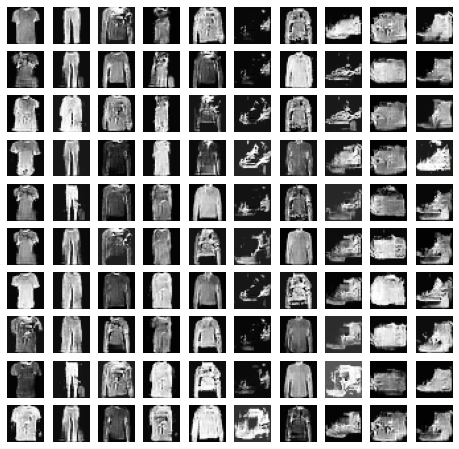

In [15]:
from keras.models import load_model

# load model
model = load_model('/kaggle/working/FashionMnist_CGAN_250epochs.h5')

# generate latent vectors to convert them to the images
latent_points, labels = generate_latent_points(100, 100)
# specify labels - generate 10 sets of labels each gping from 0 to 9
labels = np.asarray([x for _ in range(10) for x in range(10)])
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
X = (X*255).astype(np.uint8)
# plot generated images (10 sets of images, all images in a column should be of same class in the plot)
fig = plt.figure(figsize=(8, 8))
for i in range(10 * 10):
    fig.add_subplot(10, 10, i+1)
    plt.axis('off')
    plt.imshow(X[i, :, :, :], cmap='gray')
plt.show()